# TASK 2: Data Preparation and Integration

In [1]:
import pandas as pd

In [6]:

file_path = r"C:\Users\91952\Documents\ACADEMICS\Programming 1x\Projects\Axion Assessment\Data for Task 2.xlsx"


df1 = pd.read_excel(file_path, sheet_name=0)
df2 = pd.read_excel(file_path, sheet_name=1)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Primary Key                            500 non-null    object        
 1   Order No                               500 non-null    object        
 2   Segment Number                         500 non-null    int64         
 3   Order Date                             500 non-null    datetime64[ns]
 4   Manufacturer                           500 non-null    object        
 5   Model                                  500 non-null    object        
 6   Product Category                       500 non-null    object        
 7   Model Year                             500 non-null    int64         
 8   Serial Number                          500 non-null    object        
 9   Meter 1 Reading                        500 non-null    float64   

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Primary Key        500 non-null    object 
 1   Order No           500 non-null    object 
 2   Segment Number     500 non-null    int64  
 3   Coverage           81 non-null     object 
 4   Qty                500 non-null    int64  
 5   Part Manufacturer  500 non-null    object 
 6   Part Number        500 non-null    object 
 7   Part Description   500 non-null    object 
 8   Revenue            500 non-null    float64
 9   Cost               500 non-null    object 
 10  Invoice Date       500 non-null    int64  
 11  Actual Hours       482 non-null    float64
 12  Segment Total $    500 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 50.9+ KB


In [11]:
df1.head(2)

,Primary Key,Order No,Segment Number,Order Date,Manufacturer,Model,Product Category,Model Year,Serial Number,Meter 1 Reading,Complaint,Cause,Correction,Failure Condition - Failure Component,Fix Condition - Fix Component
0,SO0005588-1,SO0005588,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",NaN,"Als ich das Gerät in die Werkstatt fuhr, stieg...","No Heat - Cab, Not Achieving - Gauge",No Component Mentioned - Added
1,SO0005907-1,SO0005907,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,"No cab heat, temp gauge dont get to operating ...",NaN,"Als ich das Gerät in die Werkstatt fuhr, stieg...","No Heat - Cab, Not Achieving - Gauge",No Component Mentioned - Added


In [13]:
df2.head(3)

,Primary Key,Order No,Segment Number,Coverage,Qty,Part Manufacturer,Part Number,Part Description,Revenue,Cost,Invoice Date,Actual Hours,Segment Total $
0,SO0005588-1,SO0005588,1,mike 102-305-1811,37,PASE,042094R9-Q PASE,NO.1-15W40 CJ4QT,127.2799,96.1999$,44698,6.3798,1048.3596$
1,SO0005907-1,SO0005907,1,mike 102-305-1811,1,PASE,25505353 PASE,FLUID,30.0000,22.68$,44698,6.3798,1048.3596$
2,SO0006100-1,SO0006100,1,mike 102-305-1811,3,PASE,25500540 PASE,ACTIFUL OT PREMIX,126.0000,78.3$,44698,6.3798,1048.3596$


Both df1 and df2 have the column `"Primary Key"`. We'll use `"Primary Key"` as the join key.

### Check for Nulls:

- df1:

In [14]:
print("Nulls in df1:")
print(df1.isnull().sum(), "\n")

Nulls in df1:
Primary Key                                0
Order No                                   0
Segment Number                             0
Order Date                                 0
Manufacturer                               0
Model                                      0
Product Category                           0
Model Year                                 0
Serial Number                              0
Meter 1 Reading                            0
Complaint                                  0
Cause                                    294
Correction                                25
Failure Condition - Failure Component      0
Fix Condition - Fix Component              0
dtype: int64 



- df2:

In [15]:
print("Nulls in df2:")
print(df2.isnull().sum(), "\n")

Nulls in df2:
Primary Key            0
Order No               0
Segment Number         0
Coverage             419
Qty                    0
Part Manufacturer      0
Part Number            0
Part Description       0
Revenue                0
Cost                   0
Invoice Date           0
Actual Hours          18
Segment Total $        0
dtype: int64 



### Drop duplicates if any

In [16]:
df1.drop_duplicates(subset="Primary Key", inplace=True)
df2.drop_duplicates(subset="Primary Key", inplace=True)

### Standardize column names (strip whitespace)

In [17]:
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

In [18]:
print("\nData types:")
print(df1.dtypes, "\n")
print(df2.dtypes)


Data types:
Primary Key                                      object
Order No                                         object
Segment Number                                    int64
Order Date                               datetime64[ns]
Manufacturer                                     object
Model                                            object
Product Category                                 object
Model Year                                        int64
Serial Number                                    object
Meter 1 Reading                                 float64
Complaint                                        object
Cause                                            object
Correction                                       object
Failure Condition - Failure Component            object
Fix Condition - Fix Component                    object
dtype: object 

Primary Key           object
Order No              object
Segment Number         int64
Coverage              object
Qty            

### Convert cost and segment total to float

In [19]:
df2['Cost'] = pd.to_numeric(df2['Cost'], errors='coerce')
df2['Segment Total $'] = pd.to_numeric(df2['Segment Total $'], errors='coerce')

### Replace null 'Coverage' with 'Unknown'

In [21]:
df2['Coverage'] = df2['Coverage'].fillna('Unknown')

In [28]:
df2[['Coverage']].isnull().sum()

Coverage    0
dtype: int64

### Fill 'Cause' and 'Correction' in df1 with 'Not Mentioned'

In [24]:
df1['Cause'] = df1['Cause'].fillna('Not Mentioned')
df1['Correction'] = df1['Correction'].fillna('Not Mentioned')

In [25]:
df1[['Cause', 'Correction']].isnull().sum()

Cause         0
Correction    0
dtype: int64

### Merge on Primary Key using LEFT JOIN to preserve all rows from df1

In [29]:
merged_df = pd.merge(df1, df2, on="Primary Key", how="left")

In [30]:
merged_df.head(3)

,Primary Key,Order No_x,Segment Number_x,Order Date,Manufacturer,Model,Product Category,Model Year,Serial Number,Meter 1 Reading,...,Coverage,Qty,Part Manufacturer,Part Number,Part Description,Revenue,Cost,Invoice Date,Actual Hours,Segment Total $
0,SO0005588-1,SO0005588,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,...,mike 102-305-1811,37.0,PASE,042094R9-Q PASE,NO.1-15W40 CJ4QT,127.2799,NaN,44698.0,6.3798,NaN
1,SO0005907-1,SO0005907,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,...,mike 102-305-1811,1.0,PASE,25505353 PASE,FLUID,30.0000,NaN,44698.0,6.3798,NaN
2,SO0006100-1,SO0006100,1,2022-04-30,PASEIH,6780,APPL,0,YFT042399,2531.0999,...,mike 102-305-1811,3.0,PASE,25500540 PASE,ACTIFUL OT PREMIX,126.0000,NaN,44698.0,6.3798,NaN


In [31]:
merged_df.isnull().sum()

Primary Key                                0
Order No_x                                 0
Segment Number_x                           0
Order Date                                 0
Manufacturer                               0
Model                                      0
Product Category                           0
Model Year                                 0
Serial Number                              0
Meter 1 Reading                            0
Complaint                                  0
Cause                                      0
Correction                                 0
Failure Condition - Failure Component      0
Fix Condition - Fix Component              0
Order No_y                                 5
Segment Number_y                           5
Coverage                                   5
Qty                                        5
Part Manufacturer                          5
Part Number                                5
Part Description                           5
Revenue   

# TASK 3.1 – Trend Analysis (Visual + Insights)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

### Make sure Order Date is datetime

In [34]:
merged_df['Order Date'] = pd.to_datetime(merged_df['Order Date'])

### Count by Month

In [35]:
trend = merged_df.groupby(merged_df['Order Date'].dt.to_period('M')).size()

### Plot

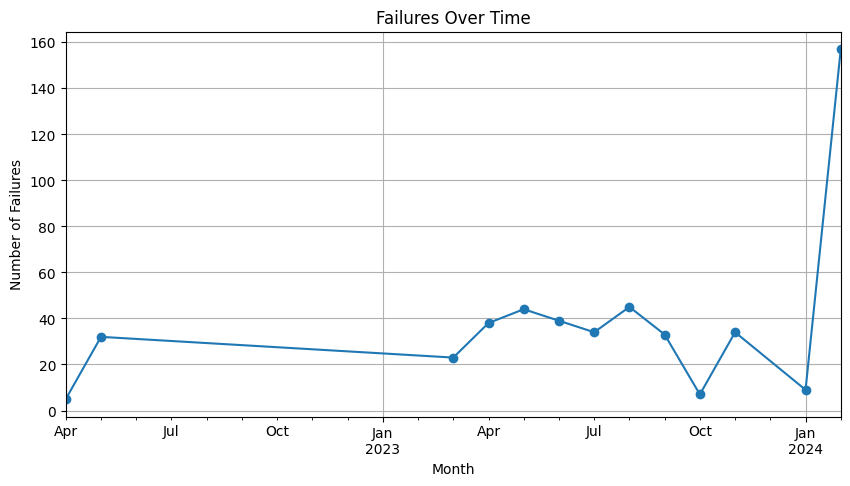

In [36]:
trend.plot(kind='line', marker='o', title="Failures Over Time", figsize=(10,5))
plt.xlabel("Month")
plt.ylabel("Number of Failures")
plt.grid()
plt.show()

### Heatmap for numeric columns

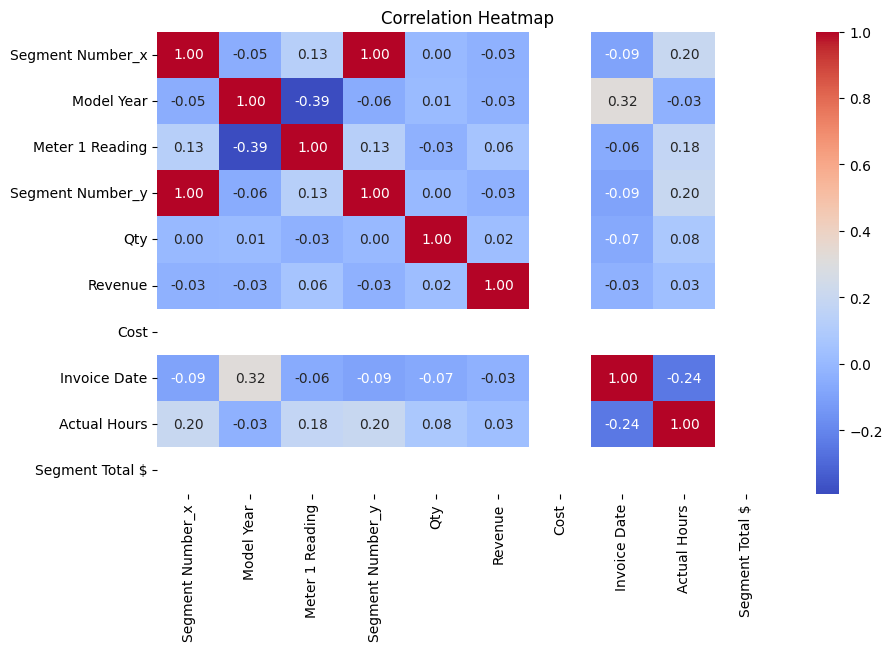

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### **Breakdown**:

- ***Correlation Coefficient:*** The numbers within each cell (e.g., 1.00, -0.05, 0.13) are the Pearson correlation coefficients, ranging from -1 to +1.
    - +1.00: Perfect positive correlation (as one variable increases, the other increases proportionally).
    - -1.00: Perfect negative correlation (as one variable increases, the other decreases proportionally).
    - 0.00: No linear correlation.
    - Values closer to +1 or -1: Stronger correlation.
    - Values closer to 0: Weaker correlation.
- ***Color Scale (Coolwarm):*** The color bar on the right indicates the range of correlation values.
    - Red (warm colors): Indicate positive correlations. Darker red means stronger positive correlation.
    - Blue (cool colors): Indicate negative correlations. Darker blue means stronger negative correlation.
    - White/Light colors: Indicate correlations close to zero (weak or no linear correlation).

# TASK 3.2 – Root Cause Identification

In [47]:
merged_df['Failure Condition - Failure Component'].unique()

array(['No Heat - Cab, Not Achieving - Gauge',
       'Not Charging - Alternator', 'Faulty - Fan',
       'Oil Loss - Not Mentioned',
       'Unavailable - Suspension, Unavailable - Axle',
       'Not Mentioned - No Component Mentioned',
       'Missed - No Component Mentioned, Missed - No Component Mentioned',
       'Leak - Coupler', 'Missed - Boom', 'Error Code - Nozzle',
       'Not Opening - Door',
       'Loose - Clip, Loose - Duct, Not Locked - Bulkhead',
       'Crushed - Compressor', 'Oil Leak - Machine',
       'Not Used - Mirror, Not Mentioned - Valve, Not Mentioned - NCV, Not Mentioned - Nozzle, Not Mentioned - Cap',
       'Oil Leak - Gear Pump, Oil Leak - Port, Water Leak - Air Line, Rubbed - Shield, Damaged - Hydraulic System',
       'Hit - Tank, Hit - Rail, Not Cradling - Boom', 'Leak - Hose',
       'Oil Leak - No Component Mentioned, Damaged - O Ring, Protruded - O Ring',
       'Broken - Harness', 'Leak - Tank',
       'Not Mentioned - Light, Incorrect - No Componen

In [48]:
merged_df['Failure Condition - Failure Component'] = merged_df['Failure Condition - Failure Component'].str.strip()


In [49]:
# Strip and simplify failure labels to the first condition
merged_df['Primary Failure Component'] = merged_df['Failure Condition - Failure Component'].str.split(',').str[0].str.strip()


In [50]:
top_primary_failures = merged_df['Primary Failure Component'].value_counts().nlargest(8).index
filtered_df = merged_df[merged_df['Primary Failure Component'].isin(top_primary_failures)]


In [52]:
merged_df['Primary Failure Component'].value_counts(dropna=False).head(10)

Primary Failure Component
Not Mentioned - Not Mentioned             72
Leak - Hose                                7
Leak - Steering                            7
Leak - Boom                                6
Not Mentioned - Boom                       6
Not Mentioned - Machine                    6
Leak - Axle                                6
Not Mentioned - No Component Mentioned     6
Not Folding - Boom                         4
Inoperative - Light                        4
Name: count, dtype: int64

In [53]:
merged_df[['Primary Failure Component', 'Cost']].dropna().shape

(0, 2)

### Plot: Avg Revenue by Failure Component (Top 8)

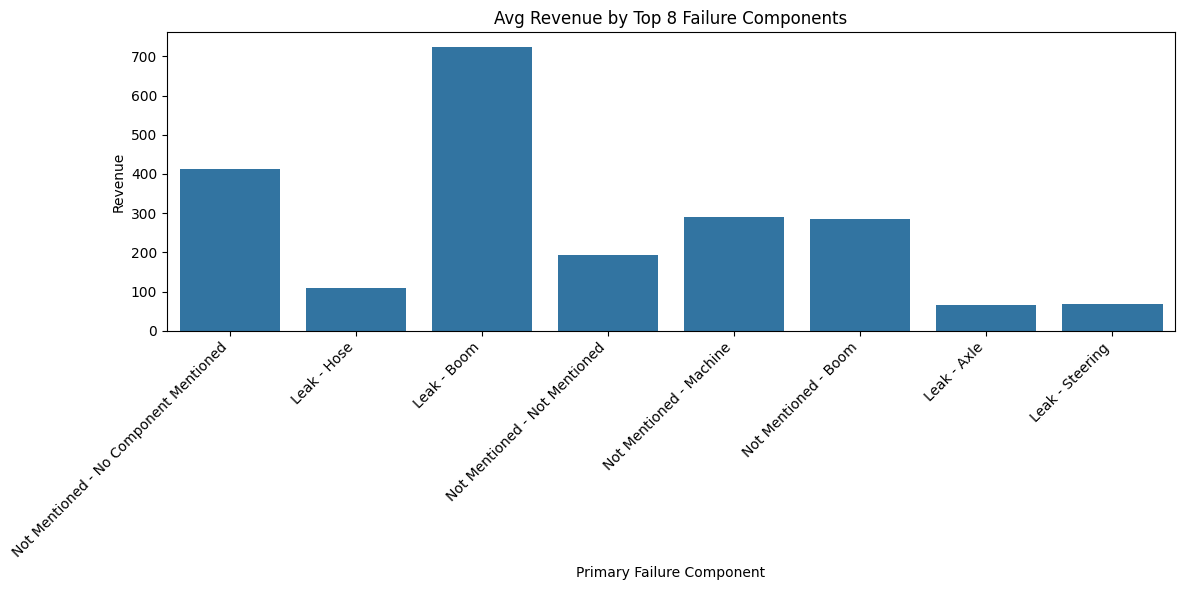

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(data=filtered_df, 
            x='Primary Failure Component', 
            y='Revenue', 
            estimator='mean',
            errorbar=None)
plt.title("Avg Revenue by Top 8 Failure Components")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Plot: Actual Hours by Failure Component (Boxplot)

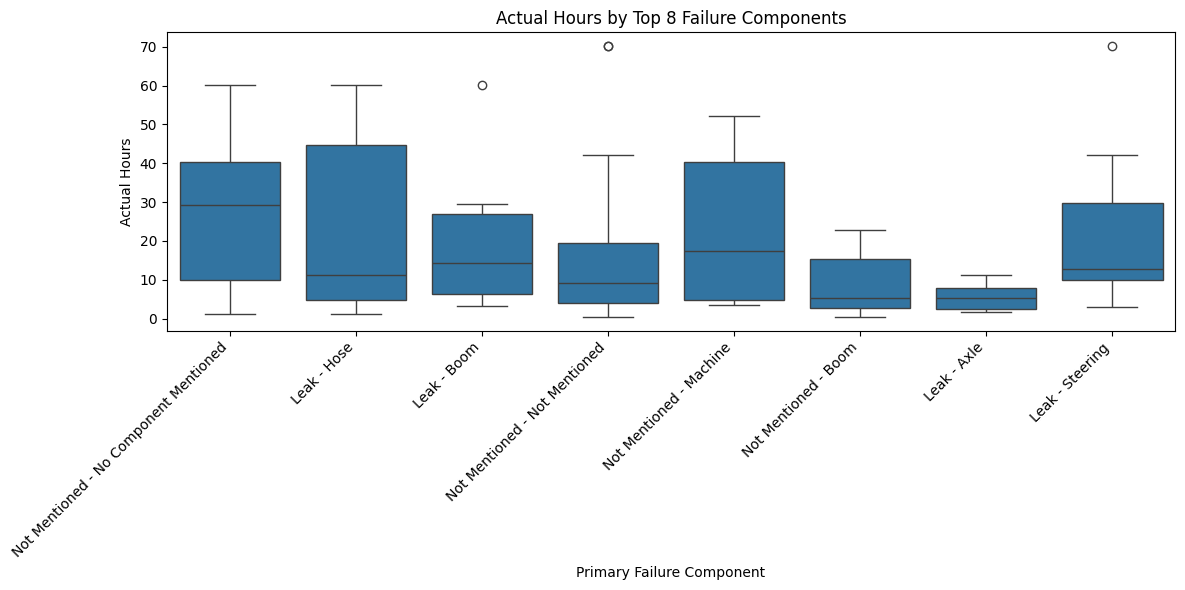

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(data=filtered_df, 
            x='Primary Failure Component', 
            y='Actual Hours')
plt.title("Actual Hours by Top 8 Failure Components")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [61]:
merged_df.to_excel("merged_task2_output.xlsx", index=False)

##  Executive Summary: Task 2 & Task 3

---

###  Task 2: Data Preparation and Integration

This task focused on cleaning, formatting, and joining two datasets for further analysis.

#### Steps Performed:

- **Loading Data**: Two Excel sheets were loaded into `df1` and `df2`.
- **Join Strategy**: Both datasets contained a common column `"Primary Key"`, which was used to perform a **left join**, keeping all records from `df1`.
- **Data Cleaning**:
  - Checked for and noted any `null` values.
  - Dropped duplicate records if present.
  - Stripped whitespace from column names to standardize naming.
  - Converted columns like `Cost` and `Segment Total` to float data types.
  - Filled missing values:
    - `Coverage` → replaced with `"Unknown"`.
    - `Cause`, `Correction` in `df1` → filled with `"Not Mentioned"`.

---

###  Task 3.1 – Trend Analysis

This analysis involved identifying temporal patterns and data relationships through visual exploration.

#### Steps Performed:

- **Date Handling**: Ensured `Order Date` was converted to proper datetime format.
- **Monthly Trends**: Grouped data by month and counted records to assess trends.
- **Visualizations**:
  - Line plot to show monthly record count.
  - Heatmap showing **correlation between numeric variables**, with interpretation of:
    - Pearson Correlation Coefficient scale (from -1 to 1).
    - Use of Coolwarm color map to distinguish strength and direction of relationships.

---

###  Task 3.2 – Root Cause Identification

This sub-task explored how component failures contribute to revenue and resource consumption.

#### Steps Performed:

- **Average Revenue by Failure Component**:
  - Bar chart showing the top 8 failure components contributing the most revenue loss.
- **Actual Hours by Failure Component**:
  - Boxplot showing variation in actual hours spent across different failure components.

---

###  Summary of Key Actions

- Standardized and merged two datasets via primary key.
- Cleaned and preprocessed text, numeric, and date fields.
- Used visual tools (line plot, heatmap, bar chart, boxplot) to explore:
  - Monthly trends
  - Variable relationships
  - Revenue and time distribution by failure component

